# Base Model Simulation
In the base model, adjustment parameter $\lambda_{base} = .0018$.

In [31]:
# packages
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

import numpy as np
import matplotlib.pyplot as plt
from simulation import simulate_emission_quadratic, simulate_log_damage
import pickle
import time

In [2]:
# model parameter
δ = .01
η = .032
median = 1.75/1000
h_hat = .2
σ_n = 1.2
γ_base = .018
ξ = 8*δ*η

## Emission trajectory simualtion
Use the above values, simulate emission based on $\tau_2 = 0$, $\xi = 8*\delta*\eta = .00256$ and $ \xi = 4*\delta*\eta = .00128$.

The simulation starts with initial reserve of 1500 and time span is 500 years.

In [8]:
# simulation settings: initial reserve, simulation timespan and function arguments
r_start = 1500
T = 500
args_trace_ϕ = (-20, -3, 5000, 1e-9, 1e-3)

In [9]:
# simulate emission for τ_2 = 0
start = time.time()
e0_1, r_grid0_1, _, e_grid0_1  = simulate_emission_quadratic(δ, η, median*γ_base, ξ, 0, 
                                                 args_trace_ϕ=args_trace_ϕ,
                                                 r_start=r_start, T=T)
end = time.time()
end-start

159.44108414649963

In [16]:
# simulato for τ != 0 and ξ = .00256
start = time.time()
e_1, r_grid_1, _, e_grid_1 = simulate_emission_quadratic(δ, η, median*γ_base, ξ, σ_n,
                                                        args_trace_ϕ = args_trace_ϕ, 
                                                        r_start = r_start, T=T)
end = time.time()
end - start

203.31267857551575

In [17]:
# simulato for τ != 0 and ξ = .00128
start = time.time()
e_05, r_grid_05, _, e_grid_05 = simulate_emission_quadratic(δ, η, median*γ_base, .5*ξ, σ_n,
                                                        args_trace_ϕ = args_trace_ϕ, 
                                                        r_start = r_start, T=T)
end = time.time()
end - start

197.6791706085205

In [32]:
e_base = dict(e0 = e0_1, e_1 = e_1, e_05 = e_05)
with open("./data/e_base", "wb") as f:
    pickle.dump(e_base, f)

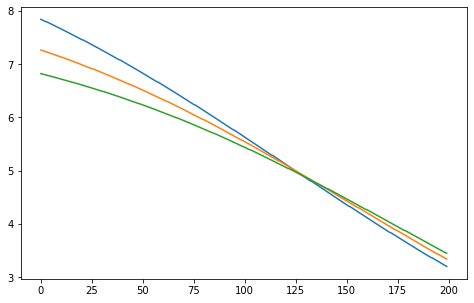

In [29]:
# plot emission for 200 years
fig = plt.figure(figsize = (8,5))
plt.plot(e0_1[:200])
plt.plot(e_1[:200])
plt.plot(e_05[:200])